# Imports / Setup

In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

# Processing Data

In [2]:
world_data = pd.read_csv('../Data/our-world-can.csv')
world_data = world_data.rename(columns={'Entity': 'Country', 'total_tests': 'Tests', '142601-annotations': 'Tested T/F', 
'Total confirmed deaths due to COVID-19': 'Deaths', 'Total confirmed cases of COVID-19': 'Cases', 'Day': 'Date'})
world_data = world_data.drop(columns=['Code', 'Tested T/F'])
world_data = world_data.fillna(0)


In [3]:
world_data

,Country,Date,Tests,Deaths,Cases
0,2020 Summer Olympics athletes & staff,2021-06-19,0.0,0.0,1.0
1,2020 Summer Olympics athletes & staff,2021-06-20,0.0,0.0,1.0
2,2020 Summer Olympics athletes & staff,2021-06-21,0.0,0.0,1.0
3,2020 Summer Olympics athletes & staff,2021-06-22,0.0,0.0,1.0
4,2020 Summer Olympics athletes & staff,2021-06-23,0.0,0.0,1.0
...,...,...,...,...,...
105718,Zimbabwe,2021-07-19,0.0,2697.0,85732.0
105719,Zimbabwe,2021-07-20,0.0,2747.0,88415.0
105720,Zimbabwe,2020-03-20,0.0,0.0,1.0
105721,Zimbabwe,2020-03-21,0.0,0.0,3.0


In [4]:
can = world_data[world_data['Country'] == 'Canada']
usa = world_data[world_data['Country'] == 'United States']

usa = usa.drop([98765,98764,98763,98762])

In [5]:
can_pivot = can.pivot_table(index = 'Date', values = ['Cases', 'Deaths', 'Tests', 'Country'], aggfunc='sum').reset_index()
usa_pivot = usa.pivot_table(index = 'Date', values = ['Cases', 'Deaths', 'Tests', 'Country'], aggfunc='sum').reset_index()

In [6]:
can_pivot = can_pivot.drop(columns='Date')
can_pivot.insert(0, 'Date', usa_pivot['Date'], True)

usa_pivot.insert(4, 'Cases/Population', usa_pivot['Cases']/328200000, True)
can_pivot.insert(4, 'Cases/Population', can_pivot['Cases']/37590000, True)

usa_pivot.insert(5, 'Deaths/Cases', usa_pivot['Deaths']/usa_pivot['Cases'], True)
can_pivot.insert(5, 'Deaths/Cases', can_pivot['Deaths']/can_pivot['Cases'], True)

usa_pivot.insert(6, 'Tests/Cases', usa_pivot['Tests']/usa_pivot['Cases'], True)
can_pivot.insert(6, 'Tests/Cases', can_pivot['Tests']/can_pivot['Cases'], True)

In [7]:
can_pivot

,Date,Cases,Deaths,Tests,Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,2.660282e-08,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,2.660282e-08,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,5.320564e-08,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,5.320564e-08,0.000000,0.000000
4,2020-01-26,2.0,0.0,0.0,5.320564e-08,0.000000,0.000000
...,...,...,...,...,...,...,...
537,2021-07-16,1430127.0,26450.0,37747547.0,3.804541e-02,0.018495,26.394542
538,2021-07-17,1430437.0,26452.0,37794221.0,3.805366e-02,0.018492,26.421451
539,2021-07-18,1430740.0,26457.0,37798244.0,3.806172e-02,0.018492,26.418667
540,2021-07-19,1431378.0,26466.0,37907486.0,3.807869e-02,0.018490,26.483211


In [8]:
usa_pivot

,Date,Cases,Deaths,Tests,Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,3.046923e-09,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,3.046923e-09,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,6.093845e-09,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,6.093845e-09,0.000000,0.000000
4,2020-01-26,5.0,0.0,0.0,1.523461e-08,0.000000,0.000000
...,...,...,...,...,...,...,...
537,2021-07-16,34054952.0,608815.0,478457652.0,1.037628e-01,0.017877,14.049576
538,2021-07-17,34067912.0,608884.0,0.0,1.038023e-01,0.017873,0.000000
539,2021-07-18,34079960.0,609019.0,0.0,1.038390e-01,0.017870,0.000000
540,2021-07-19,34132071.0,609231.0,0.0,1.039978e-01,0.017849,0.000000


In [9]:
can_pivot.insert(0, 'Country', ['Canada']*542, True)
usa_pivot.insert(0, 'Country', ['United States']*542, True)
combined = pd.concat([usa_pivot, can_pivot])

In [10]:
combined

,Country,Date,Cases,Deaths,Tests,Cases/Population,Deaths/Cases,Tests/Cases
0,United States,2020-01-22,1.0,0.0,0.0,3.046923e-09,0.000000,0.000000
1,United States,2020-01-23,1.0,0.0,0.0,3.046923e-09,0.000000,0.000000
2,United States,2020-01-24,2.0,0.0,0.0,6.093845e-09,0.000000,0.000000
3,United States,2020-01-25,2.0,0.0,0.0,6.093845e-09,0.000000,0.000000
4,United States,2020-01-26,5.0,0.0,0.0,1.523461e-08,0.000000,0.000000
...,...,...,...,...,...,...,...,...
537,Canada,2021-07-16,1430127.0,26450.0,37747547.0,3.804541e-02,0.018495,26.394542
538,Canada,2021-07-17,1430437.0,26452.0,37794221.0,3.805366e-02,0.018492,26.421451
539,Canada,2021-07-18,1430740.0,26457.0,37798244.0,3.806172e-02,0.018492,26.418667
540,Canada,2021-07-19,1431378.0,26466.0,37907486.0,3.807869e-02,0.018490,26.483211


# Visualizing Data

In [11]:
fig = px.line(can_pivot, x = "Date", y = "Cases",
             template = "plotly_dark", title = "Confirmed Cases Over Time in Canada",
              color_discrete_sequence = ['Red'])
fig.show()

fig = px.line(usa_pivot, x = "Date", y = "Cases",
             template = "plotly_dark", title = "Confirmed Cases Over Time in the USA",
              color_discrete_sequence = ['Blue'])
fig.show()

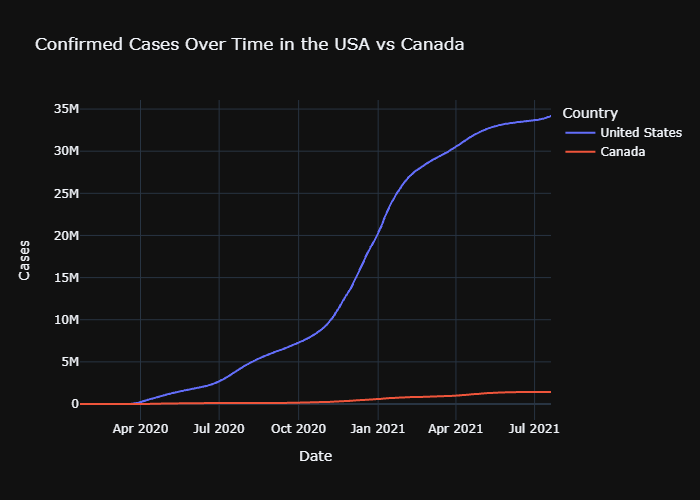

In [ ]:
fig = px.line(combined, x='Date', y='Cases', color='Country', template = "plotly_dark", title = "Confirmed Cases Over Time in the USA vs Canada")

fig.show()

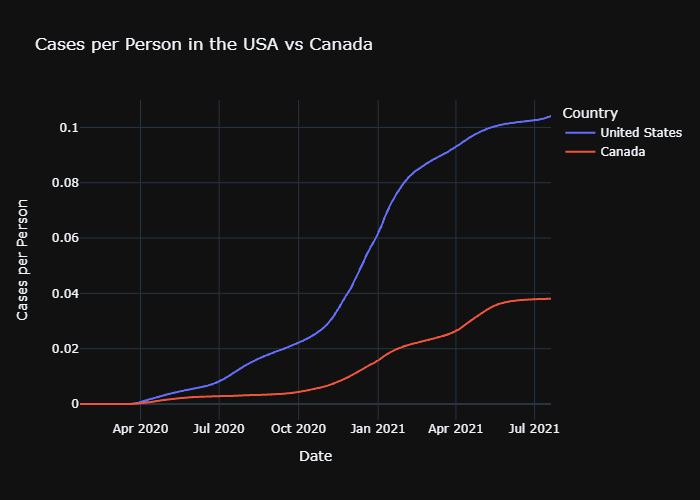

In [ ]:
fig = px.line(combined, x='Date', y='Cases/Population', color='Country', template = "plotly_dark", title = "Cases per Person in the USA vs Canada", labels={'Cases/Population': 'Cases per Person'})

fig.show()

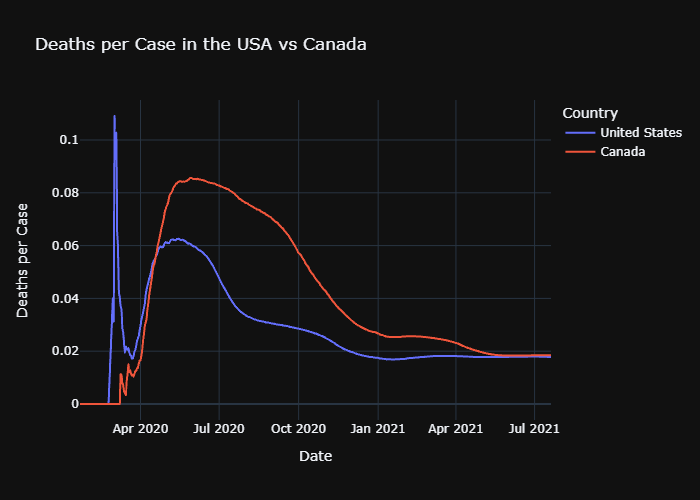

In [ ]:
fig = px.line(combined, x='Date', y='Deaths/Cases', color='Country', template = "plotly_dark", title = "Deaths per Case in the USA vs Canada", labels={'Deaths/Cases': 'Deaths per Case'})

fig.show()

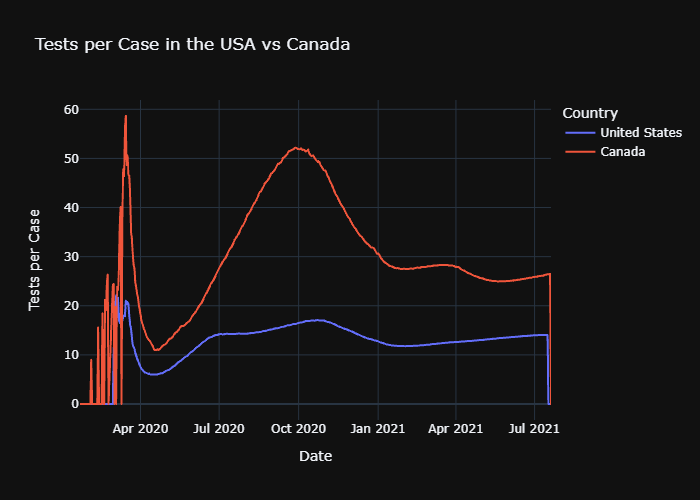

In [ ]:
fig = px.line(combined, x='Date', y='Tests/Cases', color='Country', template = "plotly_dark", title = "Tests per Case in the USA vs Canada", labels={'Tests/Cases': 'Tests per Case'})

fig.show()